# Collaboration and Competition

---

Congratulations for completing the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control agents in a more challenging environment, where the goal is to train a team of agents to play soccer.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Soccer.app"`
- **Windows** (x86): `"path/to/Soccer_Windows_x86/Soccer.exe"`
- **Windows** (x86_64): `"path/to/Soccer_Windows_x86_64/Soccer.exe"`
- **Linux** (x86): `"path/to/Soccer_Linux/Soccer.x86"`
- **Linux** (x86_64): `"path/to/Soccer_Linux/Soccer.x86_64"`
- **Linux** (x86, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86"`
- **Linux** (x86_64, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86_64"`

For instance, if you are using a Mac, then you downloaded `Soccer.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Soccer.app")
```

In [2]:
!ls Soccer_Linux/

Soccer_Data  Soccer.x86  Soccer.x86_64


In [3]:
env = UnityEnvironment(file_name="Soccer_Linux/Soccer.x86_64", no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 2
        Number of External Brains : 2
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: GoalieBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Unity brain name: StrikerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 6
        Vector Action descriptions: , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we obtain separate brains for the striker and goalie agents.

In [4]:
# print the brain names
print(env.brain_names)

# set the goalie brain
g_brain_name = env.brain_names[0]
g_brain = env.brains[g_brain_name]

# set the striker brain
s_brain_name = env.brain_names[1]
s_brain = env.brains[s_brain_name]

['GoalieBrain', 'StrikerBrain']


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)

# number of agents 
num_g_agents = len(env_info[g_brain_name].agents)
print('Number of goalie agents:', num_g_agents)
num_s_agents = len(env_info[s_brain_name].agents)
print('Number of striker agents:', num_s_agents)

# number of actions
g_action_size = g_brain.vector_action_space_size
print('Number of goalie actions:', g_action_size)
s_action_size = s_brain.vector_action_space_size
print('Number of striker actions:', s_action_size)

# examine the state space 
g_states = env_info[g_brain_name].vector_observations
g_state_size = g_states.shape[1]
print('There are {} goalie agents. Each receives a state with length: {}'.format(g_states.shape[0], g_state_size))
s_states = env_info[s_brain_name].vector_observations
s_state_size = s_states.shape[1]
print('There are {} striker agents. Each receives a state with length: {}'.format(s_states.shape[0], s_state_size))

Number of goalie agents: 2
Number of striker agents: 2
Number of goalie actions: 4
Number of striker actions: 6
There are 2 goalie agents. Each receives a state with length: 336
There are 2 striker agents. Each receives a state with length: 336


672


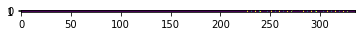

In [11]:
import matplotlib.pyplot as plt

print(np.product(s_states.shape))
plt.imshow(s_states)


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(2):                                         # play game for 2 episodes
    env_info = env.reset(train_mode=False)                 # reset the environment    
    g_states = env_info[g_brain_name].vector_observations  # get initial state (goalies)
    s_states = env_info[s_brain_name].vector_observations  # get initial state (strikers)
    g_scores = np.zeros(num_g_agents)                      # initialize the score (goalies)
    s_scores = np.zeros(num_s_agents)  
    while True:
        # select actions and send to environment
        g_actions = np.random.randint(g_action_size, size=num_g_agents)        
        s_actions = np.random.randint(s_action_size, size=num_s_agents)        
        
        actions = dict(zip([g_brain_name, s_brain_name], 
                           [g_actions, s_actions]))
        print(actions)
        env_info = env.step(actions)
        
        
        # get next states
        g_next_states = env_info[g_brain_name].vector_observations         
        s_next_states = env_info[s_brain_name].vector_observations
        
        # get reward and update scores
        g_rewards = env_info[g_brain_name].rewards
        print("g", g_rewards)
        s_rewards = env_info[s_brain_name].rewards
        print("s", s_rewards)
        g_scores += g_rewards
        s_scores += s_rewards
        
        # check if episode finished
        done = np.any(env_info[g_brain_name].local_done)  
        
        # roll over states to next time step
        g_states = g_next_states
        s_states = s_next_states
        
        
        # exit loop if episode finished
        if done:                                           
            break
        break
    break
    print('Scores from episode {}: {} (goalies), {} (strikers)'.format(i+1, g_scores, s_scores))

{'GoalieBrain': array([0, 3]), 'StrikerBrain': array([4, 2])}
g [0.0016666667070239782, 0.0016666667070239782]
s [-0.0016666667070239782, -0.0016666667070239782]


When finished, you can close the environment.

In [22]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Training the Actor-Cirtic model

In [6]:
def run_ddpg(env, goalier_team, striker_team, max_episodes=1000, max_steps=10000):
    scores = []
    goalier_brain_name, striker_brain_name = env.brain_names

    for episode in range(1, max_episodes + 1):
        env.reset(train_mode=True)

        episode_score = np.zeros(2)

        env_info = env.reset(train_mode=True)

        goalier_state = env_info[goalier_brain_name].vector_observations
        goalier_state = np.reshape(goalier_state, (1, -1))

        striker_state = env_info[striker_brain_name].vector_observations
        striker_state = np.reshape(striker_state, (1, -1))

        for step in range(max_steps):
            
            goalier_actions = np.random.randint(agent.act(goalier_state) for agent in goalier_team)  
            goalier_actions = np.asarray(goalier_actions, dtype=np.int16)
            
            striker_actions = np.random.randint(agent.act(goalier_state) for agent in striker_team)  
            striker_actions = np.asarray(strike_actions, dtype=np.int16)
            
            actions = dict(zip([goalier_brain_name, striker_brain_name],
                               [goalier_actions, striker_actions]))

            env_info = env.step(actions)

            goalier_next_state = env_info[goalier_brain_name].vector_observations
            goalier_next_state = np.reshape(goalier_next_state, (1, -1))

            striker_next_state = env_info[striker_brain_name].vector_observations
            striker_next_state = np.reshape(striker_next_state, (1, -1))

            goalier_rewards = np.mean(env_info[goalier_brain_name].rewards)
            striker_rewared = np.mean(env_info[striker_brain_name].rewards)
            rewards = goalier_rewards if goalier_rewards > striker_rewared else striker_rewared

            done = np.any(env_info[goalier_brain_name].local_done)

            episode_score += rewards

            # update each agent
            # agent1.step(state, action1, rewards[0], next_state, dones[0])
            # agent2.step(state, action2, rewards[1], next_state, dones[1])

            goalier_state = goalier_next_state
            striker_state = striker_next_state

            if done:
                break
                
        scores.append(np.max(episode_score))
        mean_score = np.mean(scores[-100:]) if len(scores) >= 100 else np.mean(scores)

        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(
            episode, mean_score, np.max(episode_score)), end="", flush=True)

        if mean_score >= 0.5:
            print("\t Model reached the score goal in {} episodes!".format(episode))
            break
    
    #save goalier actor team
    for i, agent in enumerate(goalier_team):        
        torch.save(agent.online_actor.state_dict(), "models/goalier_actor_%s.path"%i)
        torch.save(agent.online_critic.state_dict(), "models/goalier_critic_%i.path"%i)
        
    #save striker actor team
    for i, agent in enumerate(striker_team):        
        torch.save(agent.online_actor.state_dict(), "models/striker_actor_%s.path"%i)
        torch.save(agent.online_critic.state_dict(), "models/striker_critic_%i.path"%i)

    return scores

In [21]:
!mkdir models

In [24]:
import matplotlib.pyplot as plt
import torch

from agent import Agent

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Actor(nn.Module):
    def __init__(self, state_size, action_size, fc1_units, fc2_units):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.bn2 = nn.BatchNorm1d(fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):

        if state.dim() == 1:
            state = torch.unsqueeze(state, dim=0)

        x = self.bn1(F.relu(self.fc1(state)))
        x = self.bn2(F.relu(self.fc2(x)))
        x = F.softmax(self.fc3(x))
        return torch.argmax(x, dim=1) 

In [139]:
print(goalier_state_size, goalier_action_size)
actor = Actor(goalier_state_size, goalier_action_size, 512, 512)
print(actor)
input_state = torch.rand(10, goalier_state_size)
print(input_state.shape)
output = actor(input_state)
print(output.shape)
print(output.data.numpy())

336 4
Actor(
  (fc1): Linear(in_features=336, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=4, bias=True)
)
torch.Size([10, 336])
torch.Size([10])
[0 3 0 3 2 0 1 2 2 2]


/home/randson/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [120]:
m = torch.rand(10,4)

print(m.shape)
m = F.softmax(m)
print(m)
torch.argmax(m, dim=1)

torch.Size([10, 4])
tensor([[0.2038, 0.2857, 0.2039, 0.3065],
        [0.1343, 0.2727, 0.2545, 0.3385],
        [0.2215, 0.3230, 0.1610, 0.2946],
        [0.2821, 0.2860, 0.2207, 0.2112],
        [0.3779, 0.2066, 0.1926, 0.2229],
        [0.1996, 0.1845, 0.4193, 0.1966],
        [0.2118, 0.1945, 0.1987, 0.3949],
        [0.2087, 0.2335, 0.1726, 0.3852],
        [0.1781, 0.2163, 0.3337, 0.2719],
        [0.1587, 0.4103, 0.1639, 0.2671]])


/home/randson/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


tensor([3, 3, 1, 1, 0, 2, 3, 3, 2, 1])

In [20]:
goalier_team = [Agent(state_size=goalier_state_size * 2, action_size=goalier_action_size) for _ in
                range(num_goalier_agents)]

print(goalier_action_size)
print(goalier_state_size)
state = env_info[striker_brain_name].vector_observations
print(state.shape)
state = np.reshape(state, (1, -1))
actions = [agent.act(state) for agent in goalier_team]
actions = np.asarray(actions, dtype=np.int16)
print(actions)

4
336
(2, 336)
[1 0]


/home/randson/workspace/Soccer/models.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.argmax(F.softmax(self.fc3(x)))


In [145]:
import torch.nn.functional as F
a = np.array([0.3, -.13, 2.48, 0.9])
a = F.softmax(torch.from_numpy(a), dim=0, dtype=torch.float32)
torch.argmax(a)

tensor(2)

In [169]:
m = torch.rand(10,4)
print(m.shape)
n = torch.from_numpy(np.random.randint(4, size=10)).to(dtype=torch.float32).reshape(m.shape[0],-1)
print(n)
#n = torch.rand(10,1)
print(n.shape)
torch.cat((m, n), dim=1)

torch.Size([10, 4])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [2.],
        [3.],
        [1.],
        [0.],
        [1.],
        [0.]])
torch.Size([10, 1])


tensor([[0.8038, 0.5956, 0.6256, 0.1615, 0.0000],
        [0.3214, 0.9535, 0.2249, 0.8946, 0.0000],
        [0.2018, 0.8276, 0.2618, 0.2245, 0.0000],
        [0.2332, 0.9447, 0.0235, 0.8783, 1.0000],
        [0.7732, 0.2024, 0.7172, 0.4266, 2.0000],
        [0.3810, 0.6383, 0.9065, 0.8486, 3.0000],
        [0.3014, 0.0740, 0.5278, 0.6191, 1.0000],
        [0.8954, 0.5611, 0.5049, 0.2435, 0.0000],
        [0.1054, 0.2232, 0.4444, 0.4963, 1.0000],
        [0.8696, 0.3587, 0.3418, 0.7166, 0.0000]])

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("using device: ", device)
print(env)

# set the goalie brain
goalier_brain_name, striker_brain_name = env.brain_names

goalier_brain = env.brains[goalier_brain_name]
striker_brain = env.brains[striker_brain_name]

env_info = env.reset(train_mode=True)  # reset the environment

num_goalier_agents = len(env_info[goalier_brain_name].agents)
num_striker_agents = len(env_info[striker_brain_name].agents)

goalier_action_size = goalier_brain.vector_action_space_size
striker_action_size = striker_brain.vector_action_space_size

goalier_states = env_info[goalier_brain_name].vector_observations
striker_states = env_info[striker_brain_name].vector_observations

goalier_state_size = goalier_states.shape[1]
striker_state_size = striker_states.shape[1]

print("training the DDPG model...")

goalier_team = [Agent(state_size=goalier_state_size * 2, action_size=goalier_action_size) for _ in
                range(num_goalier_agents)]
striker_team = [Agent(state_size=striker_state_size * 2, action_size=striker_action_size) for _ in
                range(num_striker_agents)]

print("Num goalier agents", len(goalier_team))
print("Num striker agents", len(striker_team))

# scores = run_ddpg(env, goalier_team, striker_team, max_episodes=5000, max_steps=1000)



using device:  cpu
Unity Academy name: Academy
        Number of Brains: 2
        Number of External Brains : 2
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: GoalieBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Unity brain name: StrikerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 6
        Vector Action descriptions: , , , , , 
training the DDPG model...
Num goalier agents 2
Num striker agents 2


In [ ]:
np.random.randint((striker_team[0].action_size), size=len(striker_team))

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(scores) + 1), scores)
ax.set_ylabel('Scores')
ax.set_xlabel('Episode #')
fig.savefig("score_x_episodes.png")
plt.show()

w = 10
mean_score = [np.mean(scores[i - w:i]) for i in range(w, len(scores))]
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(mean_score) + 1), mean_score)
ax.set_ylabel('Scores')
ax.set_xlabel('Episode #')
fig.savefig("score_x_episodes_smorthed.png")
plt.show()

In [329]:
class Buffer(object):
    def __init__(self):
        self.data = []
        
    def insert(self, x):
        self.data.append(x)
        
    def reset(self):
        self.data = []
        
    def __len__(self):
        return len(self.data)
        
class Agent(object):
    buffer = None
    def __init__(self, buffer):
        # self.set_buffer(buffer)
        self.buffer = buffer
    def set_buffer(self, buffer):
        buffer = buffer
        
    def add(self, x):
        buffer.insert(x)
                

In [330]:
buffer = Buffer()
print(buffer.data)
agent1 = Agent(buffer)
agent2 = Agent(buffer)
print("agent 1:", agent1.buffer.data)
print("agent 2:", agent2.buffer.data)

[]
agent 1: []
agent 2: []


In [334]:
agent1.add(10)
agent1.add(20)
print("agent 1:", agent1.buffer.data)
print("agent 2:", agent2.buffer.data)
print(buffer.data)

agent 1: [10, 20, 10, 20, 10, 20, 10, 20]
agent 2: [10, 20, 10, 20, 10, 20, 10, 20]
[10, 20, 10, 20, 10, 20, 10, 20]
